<a href="https://colab.research.google.com/github/shivam15668/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary libraries 
# using Beautiful Soup (python library) for pulling data out of HTML and XML files 
# The Natural Language Toolkit 
import requests 
import nltk
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import random
from wordcloud import wordcloud 
import os 
import spacy 
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
!pip install pattern 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 70.3 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 5.6 MB 37.4 MB/s 
     |████████████████████████████████| 5.6 MB 32.4 MB/s 
     |████████████████████████████████| 348 kB 41.2 MB/s 
     |████████████████████████████████| 100 kB 9.4 MB/s 
     |████████████████████████████████| 4.0 MB 49.5 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=aa2c085595f3942d805fd28fc7bbcb731b4d94b3542fdae1b425a5dfc9f21726
  Stored in directory: /root/.cache/pip/wheels/ec/ce/8f/bccc2d04f3a25a5a1dd19165b2855ad3203975f25edd5838d6
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp38-cp38-linux_x86_64.whl size=102395 sha256=200a50b072bd19049183d47940388513484ed46e0cdbac2064e4e7b097f50c91
  Stored i

In [5]:
import nltk 
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
from pattern.en import sentiment 

In [7]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('https://mundoalbiceleste.com/2022/12/24/happy-birthday-to-world-cup-winner-alexis-mac-allister/')

In [8]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [9]:
#Extracting the HTML from the request object
html = r.text

In [10]:
# Printing the first 500 characters in html
print(html[:500])

<!doctype html >
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
    <title>Happy birthday to World Cup winner Alexis Mac Allister! | Mundo Albiceleste</title>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="pingback" href="https://mundoalbiceleste.com/xmlrpc.php" />
    <meta nam


In [11]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

In [12]:
#total length
len(text)

130520

In [18]:
#having a look at the text
print(text[70000:81000])

eader-wrap .sf-menu > .sfHover > a {
        color: #ffffff;
    }
    

    
    .td-header-wrap .td-header-menu-wrap .sf-menu > li > a,
    .td-header-wrap .td-header-menu-social .td-social-icon-wrap a,
    .td-header-style-4 .td-header-menu-social .td-social-icon-wrap i,
    .td-header-style-5 .td-header-menu-social .td-social-icon-wrap i,
    .td-header-style-6 .td-header-menu-social .td-social-icon-wrap i,
    .td-header-style-12 .td-header-menu-social .td-social-icon-wrap i,
    .td-header-wrap .header-search-wrap #td-header-search-button .td-icon-search {
        color: #000000;
    }
    .td-header-wrap .td-header-menu-social + .td-search-wrapper #td-header-search-button:before {
      background-color: #000000;
    }
    
    
    
    .td-header-menu-wrap.td-affix,
    .td-header-style-3 .td-affix .td-header-main-menu,
    .td-header-style-4 .td-affix .td-header-main-menu,
    .td-header-style-8 .td-header-menu-wrap.td-affix {
        background-color: #385c7b;
    }
   
    

In [19]:
clean_text= text.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [20]:
clean_text

' \n\nHappy birthday to World Cup wi  er Alexis Mac Allister! | Mu do Albiceleste\n\n\n\n\n\n\n\n\n\nwi dow._wpemojiSetti gs = {"baseUrl":"https:\\ \\ s.w.org\\ images\\ core\\ emoji\\ 14.0.0\\ 72x72\\ ","ext":".p g","svgUrl":"https:\\ \\ s.w.org\\ images\\ core\\ emoji\\ 14.0.0\\ svg\\ ","svgExt":".svg","source":{"co catemoji":"https:\\ \\ mu doalbiceleste.com\\ wp-i cludes\\ js\\ wp-emoji-release.mi .js?ver=6.1.1"}};\n *! This file is auto-ge erated * \n!fu ctio (e,a,t){var  ,r,o,i=a.createEleme t("ca vas"),p=i.getCo text&&i.getCo text("2d");fu ctio  s(e,t){var a=Stri g.fromCharCode,e=(p.clearRect(0,0,i.width,i.height),p.fillText(a.apply(this,e),0,0),i.toDataURL());retur  p.clearRect(0,0,i.width,i.height),p.fillText(a.apply(this,t),0,0),e===i.toDataURL()}fu ctio  c(e){var t=a.createEleme t("script");t.src=e,t.defer=t.type="text javascript",a.getEleme tsByTagName("head")[0].appe dChild(t)}for(o=Array("flag","emoji"),t.supports={everythi g:!0,everythi gExceptFlag:!0},r=0;r<o.le gth;r++

In [21]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [22]:
sentence 

['Happy birthday to World Cup wi  er Alexis Mac Allister!',
 '|',
 'Mu do Albiceleste\n\n\n\n\n\n\n\n\n\nwi dow._wpemojiSetti',
 'gs = {"baseUrl":"https:\\ \\ s.w.org\\ images\\ core\\ emoji\\ 14.0.0\\ 72x72\\ ","ext":".p g","svgUrl":"https:\\ \\ s.w.org\\ images\\ core\\ emoji\\ 14.0.0\\ svg\\ ","svgExt":".svg","source":{"co catemoji":"https:\\ \\ mu doalbiceleste.com\\ wp-i cludes\\ js\\ wp-emoji-release.mi .js?ver=6.1.1"}};\n *!',
 'This file is auto-ge erated *',
 '!fu ctio (e,a,t){var  ,r,o,i=a.createEleme t("ca vas"),p=i.getCo text&&i.getCo text("2d");fu ctio  s(e,t){var a=Stri g.fromCharCode,e=(p.clearRect(0,0,i.width,i.height),p.fillText(a.apply(this,e),0,0),i.toDataURL());retur  p.clearRect(0,0,i.width,i.height),p.fillText(a.apply(this,t),0,0),e===i.toDataURL()}fu ctio  c(e){var t=a.createEleme t("script");t.src=e,t.defer=t.type="text javascript",a.getEleme tsByTagName("head")[0].appe',
 'dChild(t)}for(o=Array("flag","emoji"),t.supports={everythi g:!0,everythi gExceptFlag:!0},

In [23]:
print(len(sentence))

1101


In [26]:
sentence[600]

'I saw a frie d of mi e today that is a Huge Christi a fa  a d for the 1st time I saw defeat i  his eyes, poor guy refused to talk about football for the first 20mi s a d the  he ope ed up.'

In [28]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [29]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [30]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Happy birthday to World Cup wi er Alexis Mac ...,1.0000,1.0
1,|,0.0000,0.0
2,Mu do Albiceleste\n\n\n\n\n\n\n\n\n\nwi dow._w...,0.0000,0.0
3,"gs = {""baseUrl"":""https:\ \ s.w.org\ images\ co...",-0.9375,1.0
4,This file is auto-ge erated *,0.0000,0.0


In [31]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      1101 non-null   object 
 1   Polarity      1101 non-null   float64
 2   Subjectivity  1101 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.9+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

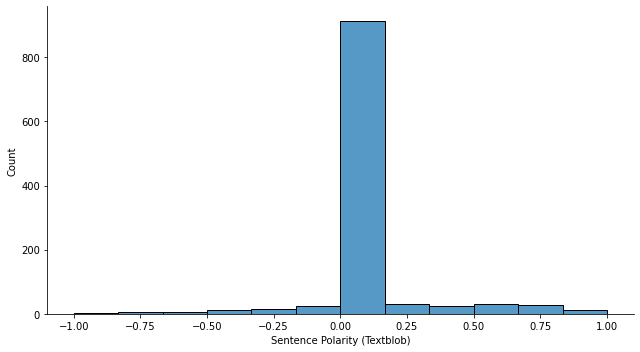

In [32]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

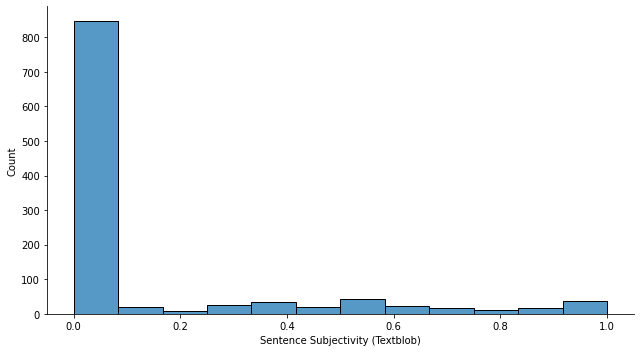

In [33]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [34]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [36]:
pattern_sentiment[1000]

['At                    11:14 am\n\n\n\nThe petitio  thi g is pathetic..',
 -1.0,
 1.0]

In [37]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [38]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Happy birthday to World Cup wi er Alexis Mac ...,1.0000,1.0
1,|,0.0000,0.0
2,Mu do Albiceleste\n\n\n\n\n\n\n\n\n\nwi dow._w...,0.0000,0.0
3,"gs = {""baseUrl"":""https:\ \ s.w.org\ images\ co...",-0.9375,1.0
4,This file is auto-ge erated *,0.0000,0.0


In [39]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      1101 non-null   object 
 1   Polarity      1101 non-null   float64
 2   Subjectivity  1101 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.9+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

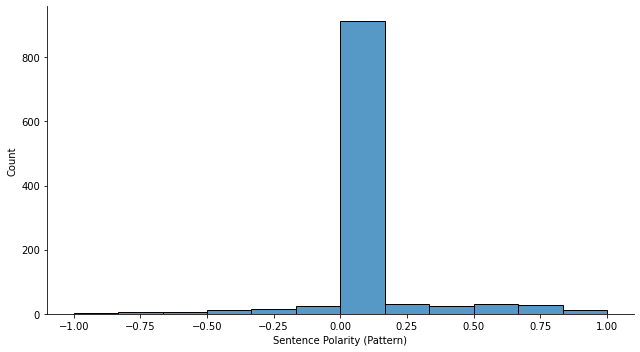

In [40]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

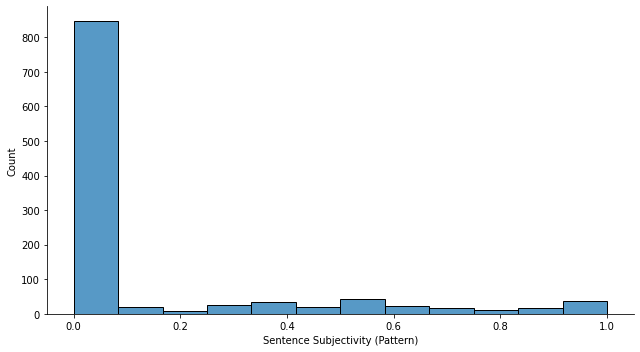

In [41]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

In [68]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

In [63]:
#tokenizer = nltk.RegexpTokenizer(r'\s+', gaps=True)
#tokenizer.tokenize(s)

['FOLLOW', 'US', '©']

In [69]:
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)

In [70]:
len(tokens)

21303

In [71]:
print(tokens[1160:1681])

['start', '2em', 'margi', 'i', 'li', 'e', 'e', 'd', '0', 'body', 'is', 'layout', 'co', 'strai', 'ed', 'alig', 'ce', 'ter', 'margi', 'left', 'auto', 'importa', 't', 'margi', 'right', 'auto', 'importa', 't', 'body', 'is', 'layout', 'co', 'strai', 'ed', 'where', 'ot', 'alig', 'left', 'ot', 'alig', 'right', 'ot', 'alig', 'full', 'max', 'width', 'var', 'wp', 'style', 'global', 'co', 'te', 't', 'size', 'margi', 'left', 'auto', 'importa', 't', 'margi', 'right', 'auto', 'importa', 't', 'body', 'is', 'layout', 'co', 'strai', 'ed', 'alig', 'wide', 'max', 'width', 'var', 'wp', 'style', 'global', 'wide', 'size', 'body', 'is', 'layout', 'flex', 'display', 'flex', 'body', 'is', 'layout', 'flex', 'flex', 'wrap', 'wrap', 'alig', 'items', 'ce', 'ter', 'body', 'is', 'layout', 'flex', 'margi', '0', 'where', 'wp', 'block', 'colum', 's', 'is', 'layout', 'flex', 'gap', '2em', 'has', 'black', 'color', 'color', 'var', 'wp', 'preset', 'color', 'black', 'importa', 't', 'has', 'cya', 'bluish', 'gray', 'color', '

In [72]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [77]:
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')

In [78]:
words_new = []

In [79]:
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [80]:
len(words_new)

15926

In [81]:
words_new[0:10]

['happy',
 'birthday',
 'world',
 'cup',
 'wi',
 'er',
 'alexis',
 'mac',
 'allister',
 'mu']

In [82]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

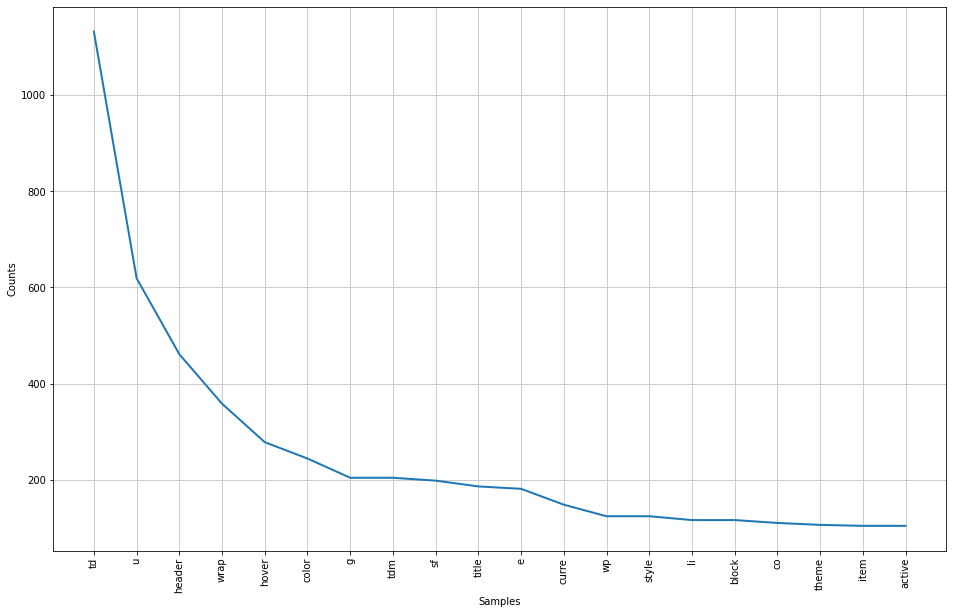

In [83]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)